#CSE422 Lab
## Introduction to Machine Learning: From Theory to Application
---



**Background Information**:
Iris is a family of multiple species of flowering plants. Setosa is one species of flower, Versicolor is another, and virginica is another.

**Problem statement**:
Suppose you are a botany student and while doing botany classes all year round you came to know that some distinguishing features of flower species are **sepal length and width, and petal length and width**. You also came across a set of samples in your class extracted from the Amazon rainforest that have already been classified into their appropriate species by experts.

In your final examination, you are taken to the Amazon rainforest and given the task of predicting the species of a set of new flowers that have not yet been classified.

###The Statistical Learning Framework
----
**1) The learner’s input**: A learner/algorithm has access to the following:

* **Domain set**: An arbitrary set, $X$ where $x_i \in \mathbb{R}^d$  and $d$ is the number of features. This is the set of objects that we
may wish to label. For example, for the iris dataset, the domain set will be the set of all flowers. Usually, these domain points will be represented by a vector of features like a flower's petal width, petal length, and so on. We also refer to domain points as instances/samples and to $X$ as instance/sample space.

* **Label set**: For the iris dataset, the label set is a three-element set: $\{0, 1, 2\}$. Let Y denote our
set of possible labels: \{0, 1, 2\}, where 0 represents the flower type 'setosa', 1 represents the flower type 'versicolor', and 2 represents 'virginica'.

* **Training data**: $S = \{(x_1, y_1), (x_2,y_2) . . . .(x_m, y_m)\}$ is a finite sequence of pairs in $X × Y$: that is, a sequence of labeled domain points. This is the input that the learner has access to. In our case it is the set of flowers for which petal length, petal width, sepal length and sepal width have been measured and their flower type determined by botanists. Such labeled examples are often called training examples. We sometimes also refer to $S$ as a training set.

**2) The learner’s output**: The learner outputs a prediction rule, $h : X → Y$. One can think of the rule as a function. This function is also called a predictor, or a hypothesis. The predictor can be used to predict the label of new domain points.
In our iris dataset, it is a rule that our learner will employ to predict whether future flowers it examines are going to be setosa, virginica or versicolor. Upon receiving a training sequence $S$ a
learning algorithm returns a hypothesis.

**A simple data-generation model** Let us now understand how the training data is generated. First, we assume that the instances (the flowers we encounter) are generated by some probability distribution (in this case, representing the environment). Let $D$ be the probability distribution over $X$. It is important to note that we do not assume that the learner knows anything about this distribution. As to the labels, in the current discussion we assume that there is some “correct” labeling function, $f : X → Y$, and that $y_i = f(x_i)$ for all $i$. The labeling function is unknown to the learner. In fact, this is just what the learner is trying to figure out. In summary, each pair in the training data $S$ is generated by first sampling a point $x_i$ according to $D$ and then labeling it by $f$.

**3) Measures of success**: We define the error of a classifier to be the probability that it does not predict the correct label on a random data point generated by the aforementioned underlying distribution, $D$. That is, the error of $h$ is the probability of drawing a random instance $x$, according to the distribution $D$, such that $h(x)$ does not equal $f(x)$.

We define the error of a prediction rule,  $ h : X → Y $, to be:
$$L_{D,f} (h) = P_{x∼D} [ h(x)  \neq  f(x) ] $$ That is, the error of such $h$ is the probability of randomly choosing an
example $x$ for which $h(x) \neq f(x)$. The subscript $(D, f)$ indicates that the error is measured with respect to the probability distribution $D$ and the
correct labeling function $f$. $L_{(D,f)}(h)$ has several synonymous names such as the generalization error, the risk, the true error of $h$, or the loss of the learner.

**Note on the information available to the learner**: The learner is
blind to the underlying distribution $D$ over the Amazon rainforest and to the labeling function $f$. In our iris example, we have just arrived in the Amazon rainforest and we have no clue as to how the flowers are distributed and how to predict the species they fall under. The only way the learner can interact with the environment is through observing the training set(which was seen in the student's classroom).

This form of learning is called Supervised Learning since the learner is provided with labels ($y_i$, where $i = 0,1,2,...,m$) while training.



**Reference**: Shalev-Shwartz, S., & Ben-David, S. (2017). Understanding Machine learning: from theory to algorithms. Cambridge: Cambridge University Press.

## A First Application: Classifying Iris Species

#### Meet the Data

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [ ]:
print(type(iris_dataset))

<class 'sklearn.utils._bunch.Bunch'>


In [ ]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#### Knowing Your Task and Knowing Your Data

In [ ]:
#print(iris_dataset['DESCR'])

In [ ]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [ ]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [ ]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


In [ ]:
print("First ten rows of data:\n", iris_dataset['data'][:10])

First ten rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [ ]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [ ]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


We can see that there are 3 classes of target labels. i.e. the flowers have been categorized into 3 classes.

In [ ]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### What is Scikit learn?

**Scikit-learn** (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support k-nearest neighbours, support vector machines, random forests, gradient boosting and so on, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. It also has other modules with helpful functions used in machine learning projects such as `train_test_split`.

                                                                --from Wikipedia

#### Measuring Success: Training and Testing Data

* Why do we train_test_split?
* Stratified v.s. Random Split

In [ ]:
from sklearn.model_selection import train_test_split
#random data splitting                              #X=features           #Y=target/label
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size = 0.25, random_state=0,stratify=iris_dataset['target'])

In [ ]:
#Stratified data splitting
#y = pd.DataFrame(iris_dataset['target'])
#X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size = 0.25, random_state=0, stratify = y)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [ ]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


#### Visualizing your data to gain more insight.

#### From the below scatter matrix, we can see that one of the class is linearly separable from the other 2, but the other 2 are not linearly separable from each other. So it's better if we use a non-linear model like KNN.

####It is important to understand how your data is distributed and use a suitable algorithm accordingly.

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

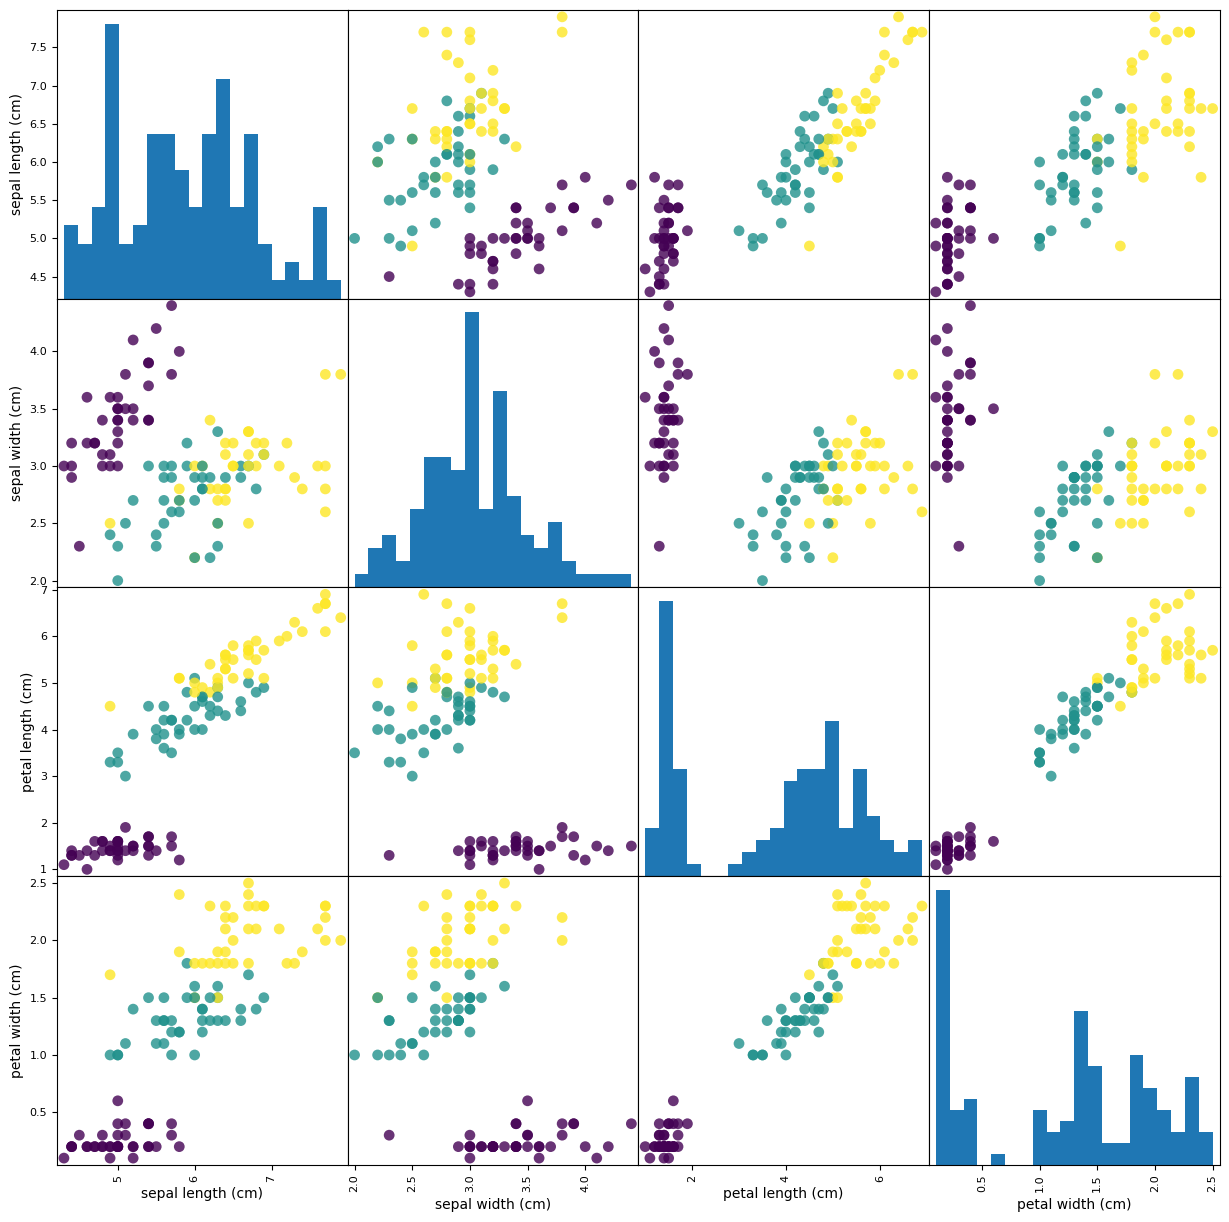

In [ ]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)

* Now, we will check if there are somewhat equal number of samples for each class. Otherwise, if there is a big shortage of samples of one class, my model might not learn to identify that specific class.

* 0 - iris-setosa, 1 - iris-versicolor, 2 - iris-virginica

Text(0, 0.5, 'no of flowers')

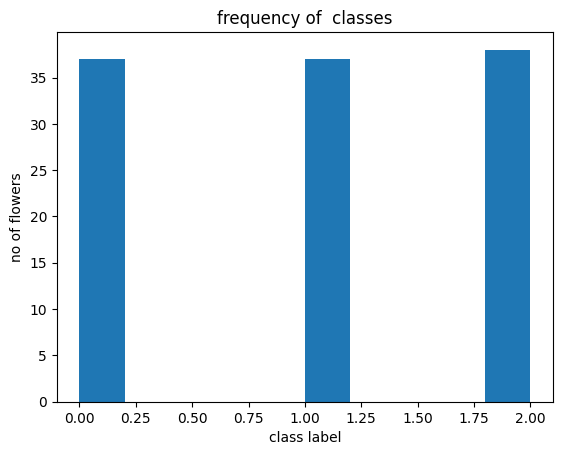

In [ ]:
fig,ax = plt.subplots()
ax.hist(y_train)
ax.set_title('frequency of  classes')
ax.set_xlabel('class label')
ax.set_ylabel('no of flowers')

#### Building and Evaluating Your First Model: k-Nearest Neighbors
* KNN is a non-linear classifier; exactly what we need!

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Making Predictions

####Just giving a sample of 1 flower(by passing an array of feature values) to check what my model categorizes it as.

In [ ]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [ ]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


#### Evaluating my Model on the test data: X_test

In [ ]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [0 0 0 0 1 1 1 0 1 2 2 2 1 2 1 0 0 2 0 1 2 1 1 0 2 0 0 1 2 1 0 1 2 2 0 1 2
 2]


##### Manually checking my error and accuracy---just to understand what is happening

In [ ]:
count = 0
for i in range( len(y_test) ):
    if y_pred[i] != y_test[i]:
        count = count + 1
error = count/len(y_pred)
print( "Error = %f " % (error*100) + '%' )
accuracy = (1-error)
print( "Accuracy = %f " % (accuracy*100) + '%' )

Error = 0.000000 %
Accuracy = 100.000000 %


#### Some easier ways to calculate accuracy.

In [ ]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 1.00


The `knn.score()` function takes in X_test, calls the `predict` function and then calls the `accuracy_score` function.

Basically, carries the two steps of: 1) calculating prediction and 2) evaluation the model, with one function call.

In [ ]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 1.00


### Outlook

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


### Summary

1) Split your data set into train and test sets.

2) Create the model object.

3) Train(using `.fit(X_train, y_train)`) your ML model on training set.

4) Calculate the predictions (using `.predict(X_test)`) of data in the test set.

5) Evaluate the predictions by calculating the accuracy on the test set.


.

.

**Reference**:
Müller Andreas Christian, and Sarah Guido. Introduction to Machine Learning with Python a Guide for Data Scientists. OReilly, 2018.